In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from skopt import BayesSearchCV
from skopt.space import Integer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
Asma = np.load('Treino_teste/Asma.npz', allow_pickle=True)
X_treino, X_teste, y_treino, y_teste, feature_names = Asma['X_treino'], Asma['X_teste'], Asma['y_treino'], Asma['y_teste'], list(Asma['feature_names'])

In [3]:
len(X_treino)

30096

In [4]:
Asma_over = np.load('Treino_teste/Asma_Over.npz', allow_pickle=True)
X_treino_over, X_teste_over, y_treino_over, y_teste_over, feature_names= Asma_over['X_treino'], Asma_over['X_teste'], Asma_over['y_treino'], Asma_over['y_teste'], list(Asma_over['feature_names'])

In [5]:
len(X_treino_over)

57134

In [6]:
Asma_under = np.load('Treino_teste/Asma_Under.npz', allow_pickle=True)
X_treino_under, X_teste_under, y_treino_under, y_teste_under, feature_names = Asma_under['X_treino'], Asma_under['X_teste'], Asma_under['y_treino'], Asma_under['y_teste'], list(Asma_under['feature_names'])

In [7]:
len(X_treino_under)

29514

In [8]:
Asma_random_under = np.load('Treino_teste/Asma_RD_Under.npz', allow_pickle=True)
X_treino_rd_under, X_teste_rd_under, y_treino_rd_under, y_teste_rd_under, feature_names = Asma_random_under['X_treino'], Asma_random_under['X_teste'], Asma_random_under['y_treino'], Asma_random_under['y_teste'], list(Asma_random_under['feature_names'])

In [9]:
len(X_treino_rd_under)

3058

In [10]:
Asma_DSTO = np.load('Treino_teste/Asma_DSTO.npz', allow_pickle=True)
X_treino_DSTO, X_teste_DSTO, y_treino_DSTO, y_teste_DSTO, feature_names = Asma_DSTO['X_treino'], Asma_DSTO['X_teste'], Asma_DSTO['y_treino'], Asma_DSTO['y_teste'], list(Asma_DSTO['feature_names'])

In [11]:
len(X_treino_DSTO)

57134

## Parametros e funcoes

In [12]:
param_bayes = {
    'criterion':  ['gini', 'entropy'],
    'max_depth': Integer(1, 50),
    'min_samples_split': Integer(2, 20),
    'min_samples_leaf': Integer(1, 10),
    'n_estimators': Integer(50, 120),
    'max_features': Integer(2, 5)
}

# Modelos

### Modelo Padrao

In [ ]:
bayes_search = BayesSearchCV(RandomForestClassifier(), param_bayes, n_iter=50, cv=5, scoring='accuracy', random_state=42)
bayes_search.fit(X_treino, y_treino)
print("\nMelhores parâmetros encontrados com BayesSearchCV:")
print(bayes_search.best_params_)
print("Melhor pontuação de validação cruzada: {:.2f}".format(bayes_search.best_score_))

In [ ]:
best_model_bayes = bayes_search.best_estimator_

### Resultados

In [ ]:
previsoes_bayes = best_model_bayes.predict(X_teste)
accuracy_bayes = accuracy_score(y_teste, previsoes_bayes)
print("Acurácia do melhor modelo (BayesSearchCV) no conjunto de teste: {:.2f}".format(accuracy_bayes))

Acurácia do melhor modelo (BayesSearchCV) no conjunto de teste: 0.95


In [ ]:
print(classification_report(y_teste, previsoes_bayes))

              precision    recall  f1-score   support

           1       0.61      0.02      0.05       681
           2       0.95      1.00      0.97     12218

    accuracy                           0.95     12899
   macro avg       0.78      0.51      0.51     12899
weighted avg       0.93      0.95      0.92     12899



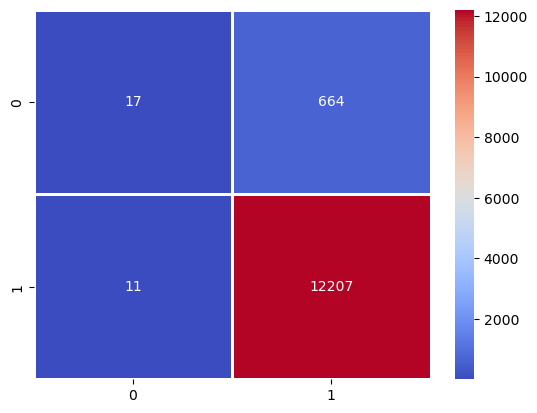

In [ ]:
cfm_matrix = confusion_matrix(y_teste,previsoes_bayes)
sns.heatmap(cfm_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.show()

Variáveis mais relevantes:
P00104: 0.15203385392292612
C008: 0.13803684996830803
P00404: 0.1379961069263809
V0022: 0.06989989691232017
A02201|A02305|A02306: 0.05617911313345595
M01601: 0.0497190520218595
P034|P035: 0.044595218121213726
IMC: 0.041465583908440275
C009: 0.037427957046584096
C004: 0.03624618228569965
N010: 0.03279125629050105
P03701|P03702: 0.031537736229681215
C00301: 0.02933281585700513
P05901|P05902|P05903|P05904: 0.02650766019223792
P053: 0.024979573995846036
Q11604: 0.0203648865007782
P050|P052: 0.016553046876895024
V0001: 0.01645398193383801
C006: 0.015746803612719032
Q092: 0.01173929451025509
Q11006: 0.010393129753054701


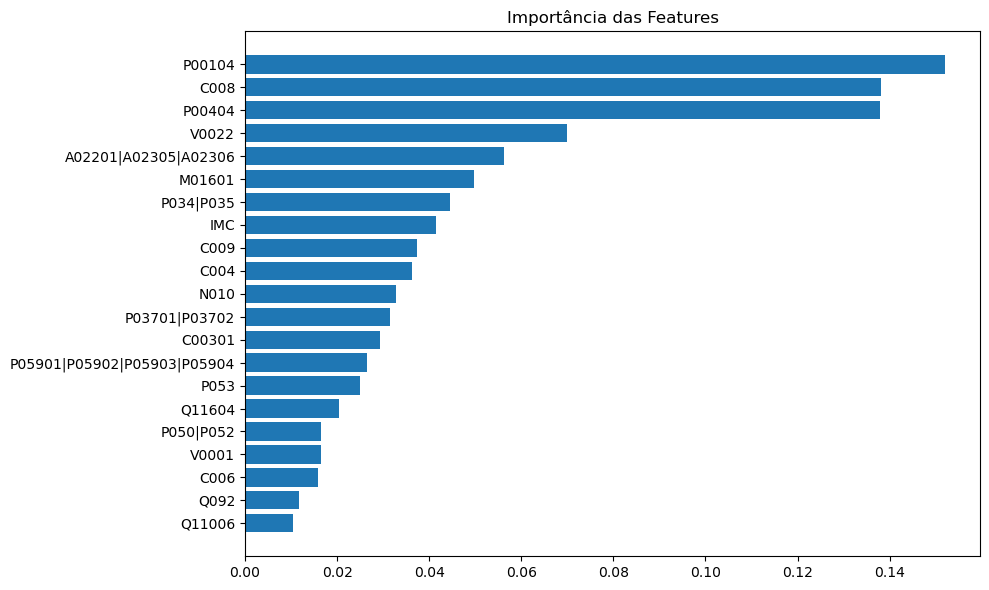

In [ ]:
# Obter a importância das features
importancias = best_model_bayes.feature_importances_

# Pegando os nomes dos atributos
nomes_das_features = feature_names

# Ordenar as features com base na importância
indices_ordenados = np.argsort(importancias)[::-1]

# Exibir as features mais importantes
print("Variáveis mais relevantes:")
for idx in indices_ordenados:
    print(f"{nomes_das_features[idx]}: {importancias[idx]}")

# Plotar a importância das features
plt.figure(figsize=(10, 6))
plt.title("Importância das Features")
plt.barh(range(X_treino.shape[1]), importancias[indices_ordenados], align="center")
nomes_array = np.array(nomes_das_features)
plt.yticks(range(X_treino.shape[1]), nomes_array[indices_ordenados])
plt.gca().invert_yaxis()  # Inverter o eixo y para que as features mais importantes fiquem no topo
plt.tight_layout()
plt.show()

### OverSampling

In [ ]:
bayes_search.fit(X_treino_over, y_treino_over)
print("\nMelhores parâmetros encontrados com BayesSearchCV:")
print(bayes_search.best_params_)
print("Melhor pontuação de validação cruzada: {:.2f}".format(bayes_search.best_score_))


Melhores parâmetros encontrados com BayesSearchCV:
OrderedDict({'criterion': 'gini', 'max_depth': 50, 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 120})
Melhor pontuação de validação cruzada: 0.95


In [ ]:
best_model_bayes = bayes_search.best_estimator_

In [ ]:
previsoes_bayes = best_model_bayes.predict(X_teste_over)

In [ ]:
print(classification_report(y_teste_over, previsoes_bayes))

              precision    recall  f1-score   support

           1       0.13      0.11      0.12       681
           2       0.95      0.96      0.96     12218

    accuracy                           0.92     12899
   macro avg       0.54      0.53      0.54     12899
weighted avg       0.91      0.92      0.91     12899



Variáveis mais relevantes:
P00104: 0.1138886976290566
P00404: 0.1134028871171163
C008: 0.10413571480714114
C009: 0.06998919482049723
M01601: 0.05913513392471782
V0022: 0.05325717156015994
Q092: 0.0437905705388362
A02201|A02305|A02306: 0.04300007584605282
P053: 0.0413490806641574
IMC: 0.03889264605171606
P03701|P03702: 0.037402708699259456
N010: 0.03583947153651625
P034|P035: 0.0352038234362328
P050|P052: 0.03260649520531456
Q11604: 0.031946158558661494
C004: 0.030553221452344057
P05901|P05902|P05903|P05904: 0.028384252792891976
V0001: 0.025287415121286745
Q11006: 0.023769817205571784
C00301: 0.02263460803308247
C006: 0.015530854999386851


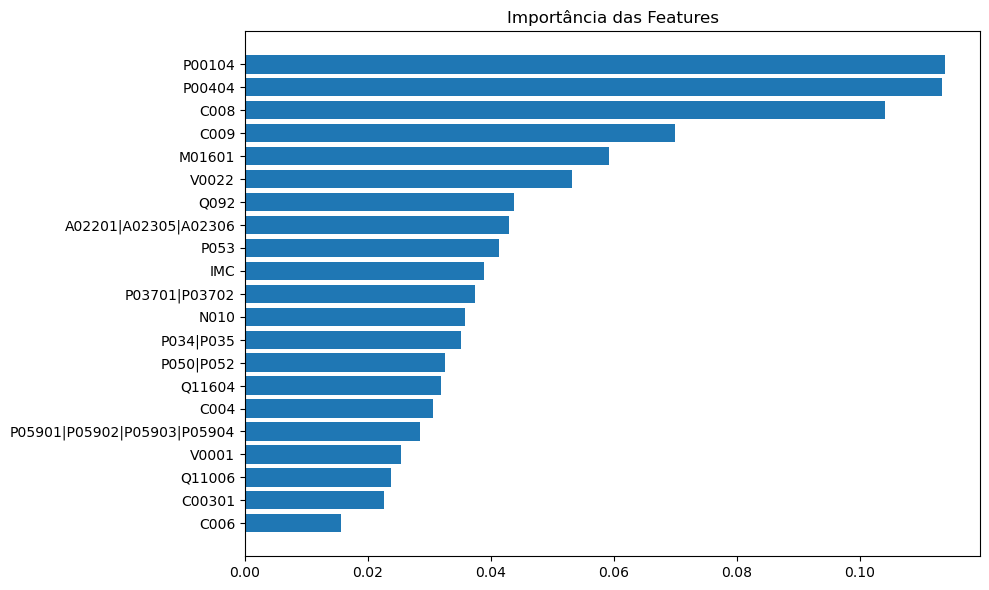

In [ ]:
# Obter a importância das features
importancias = best_model_bayes.feature_importances_

# Pegando os nomes dos atributos
nomes_das_features = feature_names

# Ordenar as features com base na importância
indices_ordenados = np.argsort(importancias)[::-1]

# Exibir as features mais importantes
print("Variáveis mais relevantes:")
for idx in indices_ordenados:
    print(f"{nomes_das_features[idx]}: {importancias[idx]}")

# Plotar a importância das features
plt.figure(figsize=(10, 6))
plt.title("Importância das Features")
plt.barh(range(X_treino.shape[1]), importancias[indices_ordenados], align="center")
nomes_array = np.array(nomes_das_features)
plt.yticks(range(X_treino.shape[1]), nomes_array[indices_ordenados])
plt.gca().invert_yaxis()  # Inverter o eixo y para que as features mais importantes fiquem no topo
plt.tight_layout()
plt.show()

### UnderSampling

In [ ]:
bayes_search.fit(X_treino_under, y_treino_under)
print("\nMelhores parâmetros encontrados com BayesSearchCV:")
print(bayes_search.best_params_)
print("Melhor pontuação de validação cruzada: {:.2f}".format(bayes_search.best_score_))


Melhores parâmetros encontrados com BayesSearchCV:
OrderedDict({'criterion': 'gini', 'max_depth': 35, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 120})
Melhor pontuação de validação cruzada: 0.95


In [ ]:
best_model_bayes = bayes_search.best_estimator_

In [ ]:
previsoes_bayes = best_model_bayes.predict(X_teste_under)

In [ ]:
print(classification_report(y_teste_under, previsoes_bayes))

              precision    recall  f1-score   support

           1       0.62      0.02      0.05       681
           2       0.95      1.00      0.97     12218

    accuracy                           0.95     12899
   macro avg       0.78      0.51      0.51     12899
weighted avg       0.93      0.95      0.92     12899



Variáveis mais relevantes:
P00104: 0.1533038781338903
P00404: 0.13945306610103705
C008: 0.13674485110415183
V0022: 0.07026847906011185
A02201|A02305|A02306: 0.05675052562871806
M01601: 0.04992675353589204
P034|P035: 0.045041493617834376
IMC: 0.04302459607553401
C009: 0.03942270207706255
C004: 0.03550855161730138
P03701|P03702: 0.03231747033791694
N010: 0.030863506173599866
C00301: 0.02932463957588683
P05901|P05902|P05903|P05904: 0.026556838316845206
P053: 0.02535975214926805
Q11604: 0.021182917540515503
P050|P052: 0.016463718920243238
V0001: 0.014634140436586082
C006: 0.014627502424184556
Q092: 0.00999016528801788
Q11006: 0.009234451885402417


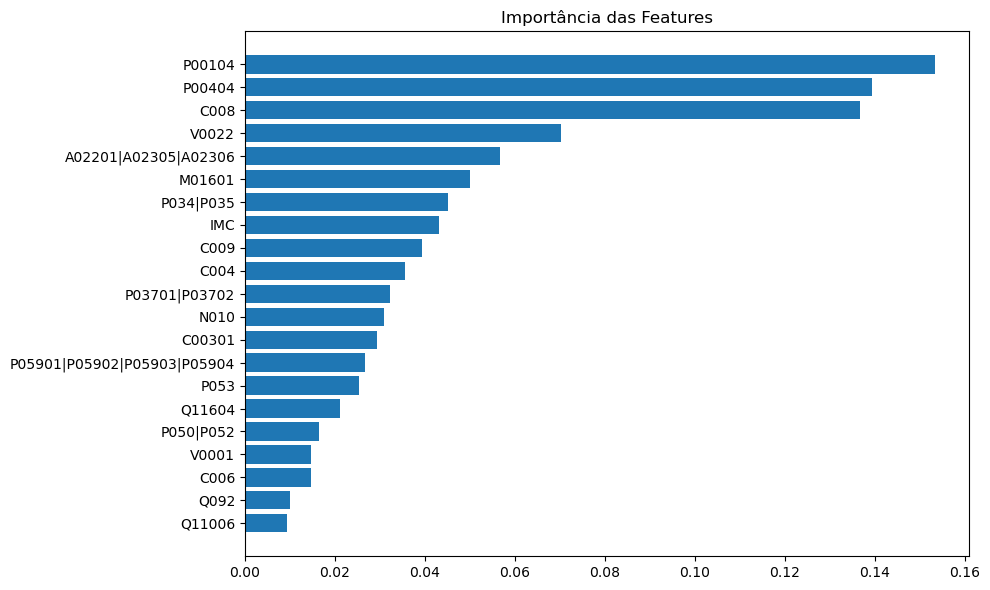

In [ ]:
# Obter a importância das features
importancias = best_model_bayes.feature_importances_

# Pegando os nomes dos atributos
nomes_das_features = feature_names

# Ordenar as features com base na importância
indices_ordenados = np.argsort(importancias)[::-1]

# Exibir as features mais importantes
print("Variáveis mais relevantes:")
for idx in indices_ordenados:
    print(f"{nomes_das_features[idx]}: {importancias[idx]}")

# Plotar a importância das features
plt.figure(figsize=(10, 6))
plt.title("Importância das Features")
plt.barh(range(X_treino.shape[1]), importancias[indices_ordenados], align="center")
nomes_array = np.array(nomes_das_features)
plt.yticks(range(X_treino.shape[1]), nomes_array[indices_ordenados])
plt.gca().invert_yaxis()  # Inverter o eixo y para que as features mais importantes fiquem no topo
plt.tight_layout()
plt.show()

### Random UnderSampling

In [ ]:
bayes_search.fit(X_treino_rd_under, y_treino_rd_under)
print("\nMelhores parâmetros encontrados com BayesSearchCV:")
print(bayes_search.best_params_)
print("Melhor pontuação de validação cruzada: {:.2f}".format(bayes_search.best_score_))


Melhores parâmetros encontrados com BayesSearchCV:
OrderedDict({'criterion': 'entropy', 'max_depth': 9, 'max_features': 4, 'min_samples_leaf': 8, 'min_samples_split': 11, 'n_estimators': 57})
Melhor pontuação de validação cruzada: 0.61


In [ ]:
best_model_bayes = bayes_search.best_estimator_

In [ ]:
previsoes_bayes = best_model_bayes.predict(X_teste_rd_under)

In [ ]:
print(classification_report(y_teste_rd_under, previsoes_bayes))

              precision    recall  f1-score   support

           1       0.08      0.53      0.13       681
           2       0.96      0.64      0.77     12218

    accuracy                           0.63     12899
   macro avg       0.52      0.59      0.45     12899
weighted avg       0.91      0.63      0.73     12899



Variáveis mais relevantes:
P00104: 0.10989761304249507
C008: 0.1046807292245671
N010: 0.10416234857478598
P00404: 0.10171980499913476
Q11604: 0.08491871757947159
V0022: 0.045858526631973665
Q092: 0.044901119049042114
M01601: 0.04457519418655622
P034|P035: 0.038447182432137725
V0001: 0.03485909035650309
IMC: 0.034399717142449805
P053: 0.03008229190241933
A02201|A02305|A02306: 0.0300583743588573
C004: 0.029394675946973963
C009: 0.02793157622008306
P03701|P03702: 0.026985270725067182
C006: 0.025377099366711096
P05901|P05902|P05903|P05904: 0.023895138450049883
C00301: 0.022454790929488187
P050|P052: 0.02165076293503413
Q11006: 0.013749975946198739


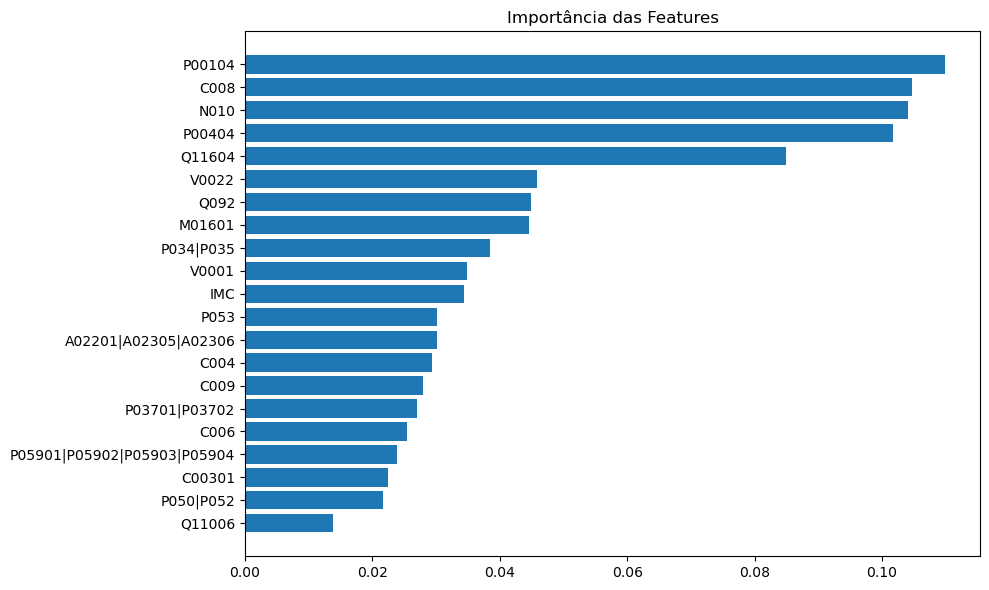

In [ ]:
# Obter a importância das features
importancias = best_model_bayes.feature_importances_

# Pegando os nomes dos atributos
nomes_das_features = feature_names

# Ordenar as features com base na importância
indices_ordenados = np.argsort(importancias)[::-1]

# Exibir as features mais importantes
print("Variáveis mais relevantes:")
for idx in indices_ordenados:
    print(f"{nomes_das_features[idx]}: {importancias[idx]}")

# Plotar a importância das features
plt.figure(figsize=(10, 6))
plt.title("Importância das Features")
plt.barh(range(X_treino.shape[1]), importancias[indices_ordenados], align="center")
nomes_array = np.array(nomes_das_features)
plt.yticks(range(X_treino.shape[1]), nomes_array[indices_ordenados])
plt.gca().invert_yaxis()  # Inverter o eixo y para que as features mais importantes fiquem no topo
plt.tight_layout()
plt.show()

### DSTO

In [ ]:
bayes_search.fit(X_treino_DSTO, y_treino_DSTO)
print("\nMelhores parâmetros encontrados com BayesSearchCV:")
print(bayes_search.best_params_)
print("Melhor pontuação de validação cruzada: {:.2f}".format(bayes_search.best_score_))

In [ ]:
best_model_bayes = bayes_search.best_estimator_

In [ ]:
previsoes_bayes = best_model_bayes.predict(X_teste_DSTO)

In [ ]:
print(classification_report(y_teste_DSTO, previsoes_bayes))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       676
           2       0.95      1.00      0.97     12229

    accuracy                           0.95     12905
   macro avg       0.47      0.50      0.49     12905
weighted avg       0.90      0.95      0.92     12905



/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Variáveis mais relevantes:
Q092: 0.17485402556647636
UPA_PNS: 0.14797667086311697
C006: 0.0986874323292012
P03701|P03702: 0.09368764273692738
N010: 0.06911984966365471
C009: 0.06650201994481886
Q11006: 0.061364883345321204
C00301: 0.05405916092682584
Q11604: 0.05246748759920285
IMC: 0.04741087858652184
P034|P035: 0.025694022979403822
C004: 0.018243464371572357
P00404: 0.01771645100306535
P05901|P05902|P05903|P05904: 0.01753427797108654
P050|P052: 0.009757026344186613
P053: 0.009188756803089558
V0024: 0.006647777443198836
C008: 0.005668491473878279
P00104: 0.005599209896006962
A02201|A02305|A02306: 0.004522176447637237
V0006_PNS: 0.00425041447605748
V0001: 0.0035248615667621726
M01601: 0.002956606568658855
V0022: 0.0025664110933287503


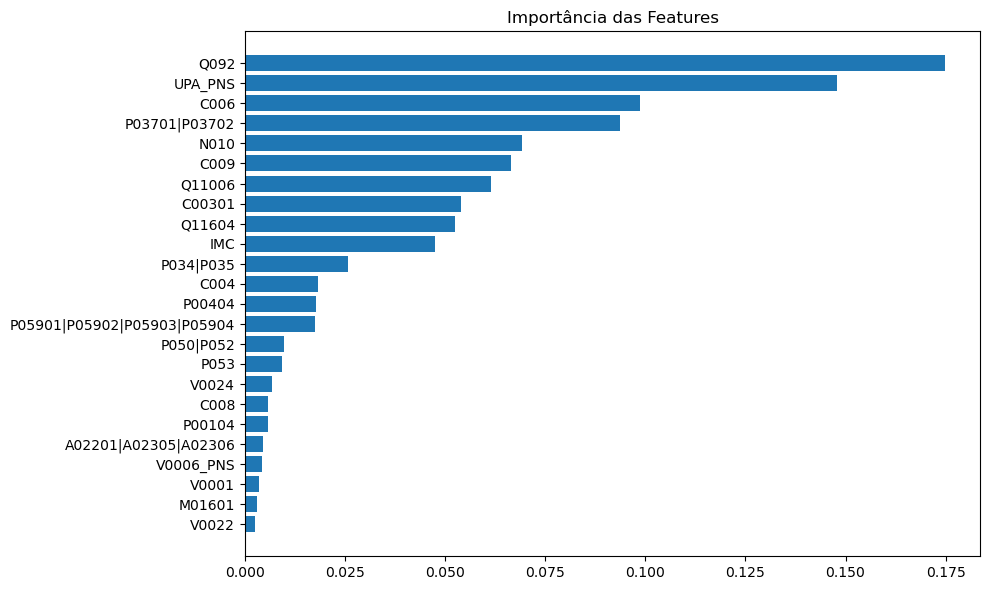

In [ ]:
# Obter a importância das features
importancias = best_model_bayes.feature_importances_

# Pegando os nomes dos atributos
nomes_das_features = feature_names

# Ordenar as features com base na importância
indices_ordenados = np.argsort(importancias)[::-1]

# Exibir as features mais importantes
print("Variáveis mais relevantes:")
for idx in indices_ordenados:
    print(f"{nomes_das_features[idx]}: {importancias[idx]}")

# Plotar a importância das features
plt.figure(figsize=(10, 6))
plt.title("Importância das Features")
plt.barh(range(X_treino.shape[1]), importancias[indices_ordenados], align="center")
nomes_array = np.array(nomes_das_features)
plt.yticks(range(X_treino.shape[1]), nomes_array[indices_ordenados])
plt.gca().invert_yaxis()  # Inverter o eixo y para que as features mais importantes fiquem no topo
plt.tight_layout()
plt.show()